In [16]:

import matplotlib.pyplot as plt
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame
import numpy as np
import joblib


In [17]:
# Load model
predictor = joblib.load('model.pkl')

In [19]:
# Load data of closing transaction
df = pd.read_csv('../CSV/df_TS_week.csv')
df.head()

,item_id,timestamp,target,ACT01,ACT03,ACT04,ACT07,ACT09,ACT13,ACT15,ACT17,ACT32,ACT34,ACT44
0,FR13,2019-12-30,7663.0,1267.0,299.0,0.0,2108.0,189.0,84.0,0.0,0.0,3716.0,0.0,0.0
1,FR13,2020-01-06,2917.0,1052.0,490.0,2.0,103.0,255.0,191.0,3.0,0.0,821.0,0.0,0.0
2,FR13,2020-01-13,2341.0,846.0,115.0,0.0,280.0,69.0,66.0,416.0,407.0,142.0,0.0,0.0
3,FR13,2020-01-20,3853.0,1350.0,932.0,44.0,568.0,297.0,278.0,81.0,80.0,223.0,0.0,0.0
4,FR13,2020-01-27,82251.0,1871.0,863.0,0.0,609.0,363.0,219.0,2.0,0.0,19393.0,0.0,58931.0


In [20]:
df.loc[:, "log_target"] = np.log(df["target"] + 1e-8)
# Create a new df of the item_id equal to IT01 
df = df[df['item_id'] == 'IT01']
# Drop ACT04 column
df = df.drop(columns=['ACT04'])
df.head()

,item_id,timestamp,target,ACT01,ACT03,ACT07,ACT09,ACT13,ACT15,ACT17,ACT32,ACT34,ACT44,log_target
348,IT01,2019-12-30,7613.0,1228.0,87.0,195.0,188.0,32.0,1817.0,1255.0,2811.0,0.0,0.0,8.937613
349,IT01,2020-01-06,651.0,87.0,63.0,5.0,8.0,0.0,0.0,0.0,227.0,261.0,0.0,6.478510
350,IT01,2020-01-13,702.0,161.0,10.0,14.0,0.0,49.0,1.0,0.0,467.0,0.0,0.0,6.553933
351,IT01,2020-01-20,941.0,437.0,143.0,86.0,67.0,110.0,0.0,0.0,98.0,0.0,0.0,6.846943
352,IT01,2020-01-27,1470.0,403.0,457.0,178.0,108.0,48.0,7.0,0.0,269.0,0.0,0.0,7.293018


In [21]:
# Convert test_data to TimeSeriesDataFrame
data = TimeSeriesDataFrame(
    df, 
    id_column="item_id",
    timestamp_column="timestamp"
    
)

data.head()

target   ACT01  ACT03  ACT07  ACT09  ACT13   ACT15  \
item_id timestamp                                                        
IT01    2019-12-30  7613.0  1228.0   87.0  195.0  188.0   32.0  1817.0   
        2020-01-06   651.0    87.0   63.0    5.0    8.0    0.0     0.0   
        2020-01-13   702.0   161.0   10.0   14.0    0.0   49.0     1.0   
        2020-01-20   941.0   437.0  143.0   86.0   67.0  110.0     0.0   
        2020-01-27  1470.0   403.0  457.0  178.0  108.0   48.0     7.0   

                     ACT17   ACT32  ACT34  ACT44  log_target  
item_id timestamp                                             
IT01    2019-12-30  1255.0  2811.0    0.0    0.0    8.937613  
        2020-01-06     0.0   227.0  261.0    0.0    6.478510  
        2020-01-13     0.0   467.0    0.0    0.0    6.553933  
        2020-01-20     0.0    98.0    0.0    0.0    6.846943  
        2020-01-27     0.0   269.0    0.0    0.0    7.293018

In [22]:
predizioni = predictor.predict(df)

data with frequency 'None' has been resampled to frequency 'W-MON'.


data contains missing values represented by NaN. They have been filled by carrying forward the last valid observation.


In [23]:
predizioni.head()

mean          0.1          0.2          0.3  \
item_id timestamp                                                        
IT01    2023-05-01  3885.378418  3127.371338  3329.900635  3482.946533   
        2023-05-08   384.311768  -315.259521   240.048950   281.183960   
        2023-05-15   480.979248  -374.347412   257.282227   298.787842   
        2023-05-22  1240.841064   255.527466   824.516113   963.581665   
        2023-05-29  2251.584473   926.980957  1583.796387  1754.286499   

                            0.4          0.5          0.6          0.7  \
item_id timestamp                                                        
IT01    2023-05-01  3725.954590  3885.378418  4199.526367  4634.024414   
        2023-05-08   397.669189   384.311768   474.975952  1029.071045   
        2023-05-15   446.546753   480.979248   628.272339  1201.313110   
        2023-05-22  1142.015869  1240.841064  1455.957764  1989.539795   
        2023-05-29  2014.072876  2251.584473  2597.886230  3138.445312   

                            0.8          0.9  
item_id timestamp                             
IT01    2023-05-01  4710.874023  5406.157227  
        2023-05-08  1226.130127  2060.759277  
        2023-05-15  1388.678711  2348.745361  
        2023-05-22  2159.034424  3013.729736  
        2023-05-29  3240.585693  4250.339355

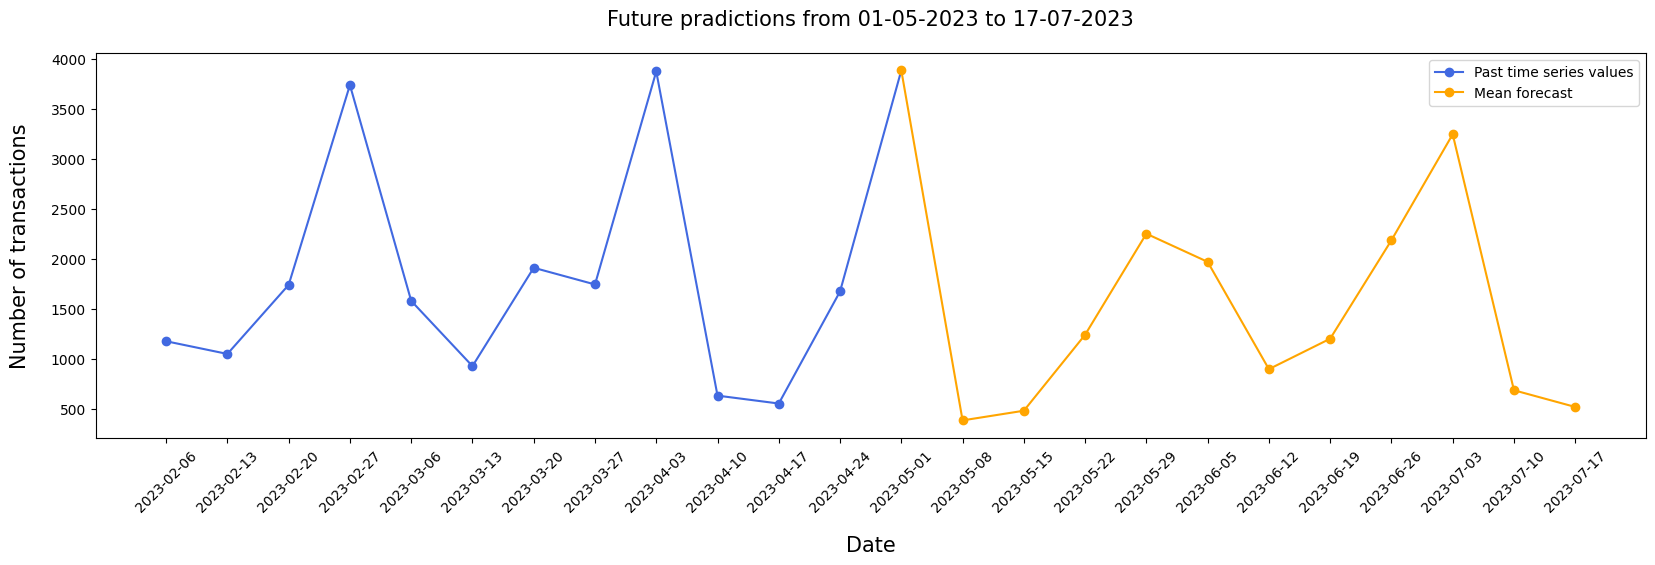

In [24]:
plt.figure(figsize=(20, 5))
plt.title("Future pradictions from 01-05-2023 to 17-07-2023", pad=20, fontsize=15)

item_id = "IT01"
y_past = data.loc[item_id]["target"]
y_pred = predizioni.loc[item_id]

# Get the dates for each observation
all_dates = list(y_past.index[-12:]) + list(y_pred.index)
all_ticks = range(len(all_dates))

# Set the x-axis range for past and future
past_ticks = range(12)
future_ticks = range(12, len(all_dates))

plt.plot(past_ticks, y_past[-12:], label="Past time series values", marker='o',color='royalblue', linestyle='-')

# Add the first point of future predictions to the past time series
plt.plot([11, 12], [y_past.iloc[-1], y_pred["mean"].iloc[0]], color='royalblue', linestyle='-')

plt.plot(future_ticks, y_pred["mean"], label="Mean forecast", color='orange', marker='o', linestyle='-')

# Set the x-axis range for fill_between
fill_ticks = range(12, len(y_pred.index) + 12)

#plt.fill_between(
#    fill_ticks, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
#)

# Set x-axis labels with dates without time
date_labels = [date.strftime("%Y-%m-%d") for date in all_dates]
plt.xticks(all_ticks, date_labels, rotation=45)

# Add label for x-axis and y-axis
plt.xlabel("Date", fontsize=15, labelpad=15)
plt.ylabel("Number of transactions", fontsize=15, labelpad=15)

plt.legend()
plt.show()
